In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('ggplot')

In [2]:
os.chdir("/home/douglas/Projects/repositories/IBM-Courses/Python for Data Analytics/")
os.getcwd()

'/home/douglas/Projects/repositories/IBM-Courses/Python for Data Analytics'

# The Architecture

Scripting Layer (pyplot) ---> Artist Layer (Artist) ---> Backend Layer (FigureCanva, Renderer, Event)

Artist: 
1. Primitive: Line2D, Rectangle, Circle, and Text
2. Composite: Axis, Tick, Axes, and Figure

Scripting Lyaer is to non professional developers.

Link: http://aosabook.org/en/matplotlib.html

In [3]:
# Figure Canva
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

# Figure Artist
from matplotlib.figure import Figure

In [4]:
fig = Figure()
canvas = FigureCanvas(fig)

# numpy array
x = np.random.randn(10000)

ax = fig.add_subplot(111) # create an axes artist (row, column, locale)

ax.hist(x, 100) # generate a histogram of the 10000 numbers

# add  title to the figure and save it
ax.set_title('Normal distribution with $\mu = 0, \sigma=1$')

#fig.savefig('img/matplotlib_histogram')

Text(0.5, 1.0, 'Normal distribution with $\\mu = 0, \\sigma=1$')

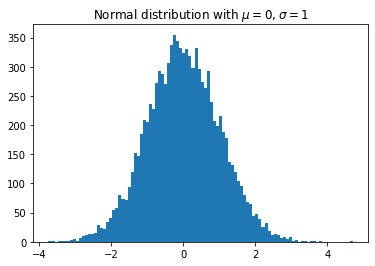

In [5]:
# usando pyplot, Scripting Layer
plt.hist(x, 100)
plt.title('Normal distribution with $\mu = 0, \sigma=1$')
# plt.savefig('img/matplotlib_histogram')
plt.show()

# Basic plots

In [6]:
# include plot in notebook
%matplotlib inline

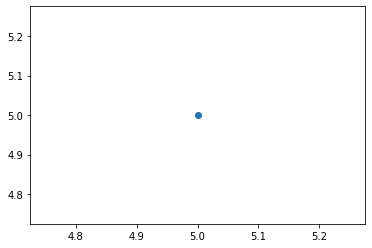

In [7]:
plt.plot(5, 5, 'o')
plt.show()

In [8]:
# dataset imigrattion
df = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                  sheet_name ='Canada by Citizenship',
                  skiprows = range(20),
                  skipfooter =  2
        )

In [26]:
df = df.iloc[:, 0:43]
df = df.set_index('OdName')

In [84]:
correct_cols = list(set(df.columns) - set(df[range(1980, 2014)].columns))

years = list(map(str, range(1980, 2014)))

all_cols = correct_cols + years

df.columns = all_cols

In [88]:
df.head()

,DEV,DevName,REG,Coverage,Type,RegName,AreaName,AREA,1980,1981,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
OdName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,0,1,1,0,0,0,0,1,1


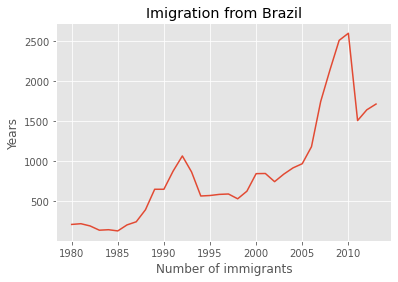

In [95]:
# line plot
df.loc['Brazil', years].plot(kind = 'line')

plt.title('Imigration from Brazil')
plt.ylabel('Years')
plt.xlabel('Number of immigrants')

plt.show()

In [103]:
# area plot
df['Total'] = df[years].sum(axis=1)
df.sort_values('Total', ascending=False, inplace=True)
df_area = df[years].head().transpose()

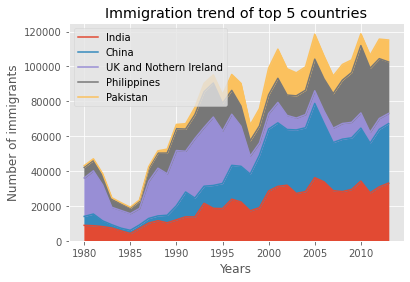

In [123]:
df_area.plot(kind = 'area')

plt.title('Immigration trend of top 5 countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.legend(['India', 'China', 'UK and Nothern Ireland', 'Philippines', 'Pakistan'])

plt.show()

Text(0.5, 0, 'Number of Immigrants')

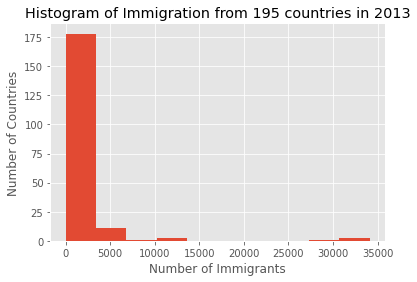

In [130]:
# histogram
count, bin_edges = np.histogram(df['2013'])

df['2013'].plot(kind = 'hist') #xticks = bin_edges

plt.title('Histogram of Immigration from 195 countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

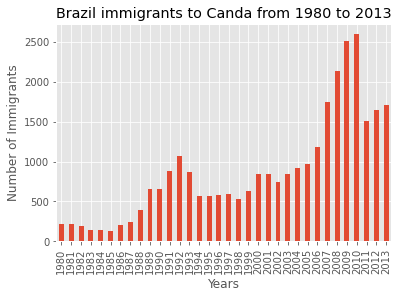

In [131]:
# bar plot
df_brazil = df.loc['Brazil', years]

df_brazil.plot(kind = 'bar')

plt.title('Brazil immigrants to Canda from 1980 to 2013')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

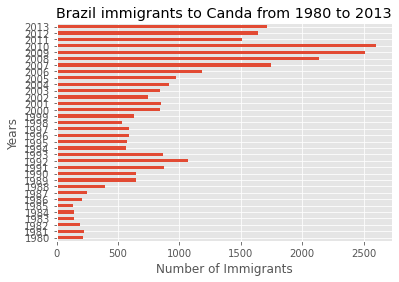

In [133]:
# horizontal bar plot
df_brazil.plot(kind = 'barh')

plt.title('Brazil immigrants to Canda from 1980 to 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Years')

plt.show()

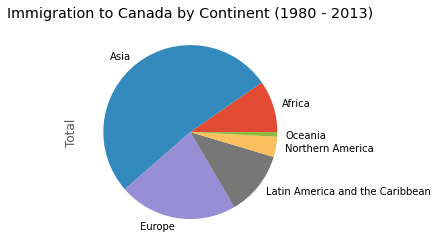

In [143]:
# pie chart
df_continent = df.groupby('Coverage', axis = 0).sum()

df_continent['Total'].plot(kind = 'pie')

plt.title('Immigration to Canada by Continent (1980 - 2013)')

plt.show()

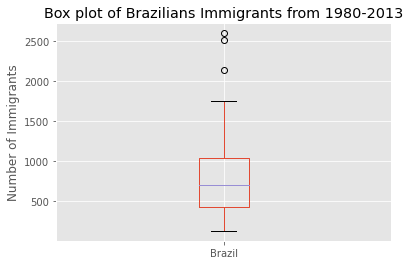

In [155]:
# box plots
df_brazil[years].plot( kind = 'box')

plt.title('Box plot of Brazilians Immigrants from 1980-2013')
plt.ylabel('Number of Immigrants')

plt.show()

Text(0.5, 0, 'Year')

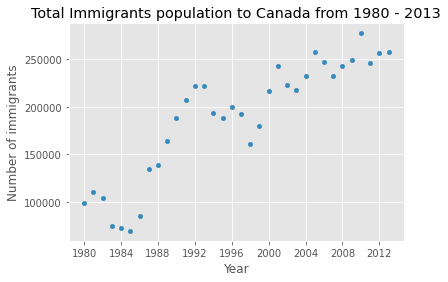

In [210]:
# scatter plot
df_total  = df[years].sum().to_frame(name = 'total').reset_index()
df_total['year'] = pd.to_datetime(df_total['index'])

df_total.plot(kind = 'scatter', x = 'year', y = 'total')

plt.title('Total Immigrants population to Canada from 1980 - 2013')
plt.ylabel('Number of immigrants')
plt.xlabel('Year')

<AxesSubplot:xlabel='index', ylabel='total'>

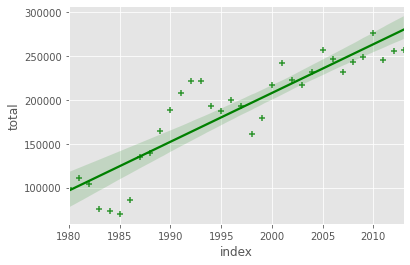

In [220]:
# seaborn regression plots

# to avoid 'TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'' error
df_total['index'] = df_total['index'].astype(float)

sns.regplot(x = 'index', y = 'total', data= df_total, color = 'green', marker= '+')

## Creating Maps and Visualizing Geospatial Data

In [229]:
#  introduction to folium
##! pip install folium
import folium

In [230]:
world_map = folium.Map()

world_map

In [234]:
# creating the Brazil map
brazil_map = folium.Map(location = [-16.1237611, -59.9219642], 
                        zoom_start = 4,
                        tiles = 'Stamen Terrain')  #'Stamen Toner'
brazil_map

In [240]:
canada_map = folium.Map(
    location = [56.130, -106.35],
    zoom_start = 4)

## add a red marker to Ontario

# create a feature group
ontario = folium.map.FeatureGroup()

# style the feature group
ontario.add_child(
    folium.features.CircleMarker(
        [51.25, -85.32], radius = 5, color = 'red', fill_collor = 'Red'))

# add feature group to the map
canada_map.add_child(ontario)

# label the marker
folium.Marker([51.25, -85.32],
             popup='Ontario').add_to(canada_map)

# display map
canada_map